In [1]:
from models import mlp, cnn

In [2]:
import json

In [3]:
dataset = "cifar10"
#dataset = "mnist"
#nn_type = "mlp"
nn_type = "cnn"
cfg_filename = f"configs/{nn_type}/config-{dataset}.json"

In [4]:
with open(cfg_filename) as cfg_file:
    cfg = json.load(cfg_file)

In [5]:
cfg

{'MODEL': {'TYPE': 'cnnnet',
  'DEPTH': 0,
  'NUM_CLASSES': 10,
  'LOSS_FUN': 'cross_entropy',
  'LAYERS': 3},
 'RGRAPH': {'DIM_FIRST': 64,
  'DIM_LIST': [64, 128, 256],
  'STEM_MODE': 'default',
  'TALK_MODE': 'dense',
  'GROUP_NUM': 64,
  'GROUP_SIZE': 1,
  'GRAPH_TYPE': 'ws',
  'SPARSITY': 0.5,
  'P': 0.128,
  'SEED_GRAPH': 4,
  'SEED_TRAIN': 1,
  'SEED_TRAIN_START': 1,
  'SEED_TRAIN_END': 6,
  'KEEP_GRAPH': True,
  'ADD_1x1': 0,
  'UPPER': True,
  'AUTO_MATCH': True,
  'AGG_FUNC': 'sum',
  'SAVE_GRAPH': False},
 'BN': {'EPS': 1e-05,
  'MOM': 0.1,
  'USE_PRECISE_STATS': True,
  'NUM_SAMPLES_PRECISE': 1024,
  'ZERO_INIT_FINAL_GAMMA': False},
 'OPTIM': {'BASE_LR': 0.1,
  'LR_POLICY': 'cos',
  'GAMMA': 0.1,
  'STEP_SIZE': 1,
  'STEPS': [],
  'LR_MULT': 0.1,
  'MAX_EPOCH': 10,
  'MOMENTUM': 0.9,
  'DAMPENING': 0.0,
  'NESTEROV': True,
  'WEIGHT_DECAY': 0.0005,
  'WARMUP_FACTOR': 0.1,
  'WARMUP_EPOCHS': 0},
 'TRAIN': {'DATASET': 'cifar10',
  'SPLIT': 'train',
  'BATCH_SIZE': 128,
  'EVAL

In [6]:
import utils.scheduler as sch

In [7]:
import torch
import torch.optim as optim
import torch.nn as nn

In [20]:
from src import train
from loaders import cifar10, mnist

In [15]:
#cfg["RGRAPH"]["SPARSITY"] = 0.5
#cfg["RGRAPH"]["GRAPH_TYPE"] = 'ba'

In [57]:
#mlpnet = mlp.MLPNet(cfg)
cnnnet = cnn.CNN(cfg)

In [58]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [59]:
#mlpnet = mlpnet.to(device)
cnnnet = cnnnet.to(device)

In [60]:
train_loader, test_loader = cifar10.prepare_data(cfg)
#train_loader, test_loader = mnist.prepare_data(cfg)

Files already downloaded and verified
Files already downloaded and verified


In [34]:
1 & 1

1

In [23]:
import importlib

In [61]:
importlib.reload(train)

<module 'src.train' from '/home/blackadder/TheoreticalMethodsOfDL/FinalProject/Graph2NN/src/train.py'>

In [62]:
loss_fn = nn.CrossEntropyLoss()

# optimizer = optim.SGD(mlpnet.parameters(), 
#                       lr=cfg["OPTIM"]["BASE_LR"], 
#                       momentum=cfg["OPTIM"]["MOMENTUM"], 
#                       weight_decay=cfg["OPTIM"]["WEIGHT_DECAY"])

optimizer = optim.SGD(cnnnet.parameters(), 
                      lr=cfg["OPTIM"]["BASE_LR"], 
                      momentum=cfg["OPTIM"]["MOMENTUM"], 
                      weight_decay=cfg["OPTIM"]["WEIGHT_DECAY"])

scheduler = sch.create_scheduler(optimizer, cfg)

In [63]:
history = train.run_training_procedure(cnnnet, 
                             cfg=cfg, 
                             train_loader=train_loader, 
                             loss_fn=loss_fn, 
                             optimizer=optimizer, 
                             test_loader=test_loader, 
                             scheduler=scheduler, 
                             log = False, 
                             return_metrics=True, 
                             evaluate_on_test=True)

top1_err : 55.7060917721519
top5_err : 8.791534810126583
---

top1_err : 48.269382911392405
top5_err : 5.617088607594937
---

top1_err : 45.62895569620253
top5_err : 5.0039556962025316
---

top1_err : 41.87104430379747
top5_err : 4.0842563291139244
---

top1_err : 38.59770569620253
top5_err : 3.6985759493670884
---

top1_err : 38.25158227848101
top5_err : 2.956882911392405
---

top1_err : 35.452927215189874
top5_err : 2.778876582278481
---

top1_err : 34.93868670886076
top5_err : 2.7492088607594938
---

top1_err : 34.24643987341772
top5_err : 2.6404272151898733
---

top1_err : 33.3564082278481
top5_err : 2.492088607594937
---



In [64]:
history

{'train_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'train_acc1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'train_acc5': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'test_acc1': [55.7060917721519,
  48.269382911392405,
  45.62895569620253,
  41.87104430379747,
  38.59770569620253,
  38.25158227848101,
  35.452927215189874,
  34.93868670886076,
  34.24643987341772,
  33.3564082278481],
 'test_acc5': [8.791534810126583,
  5.617088607594937,
  5.0039556962025316,
  4.0842563291139244,
  3.6985759493670884,
  2.956882911392405,
  2.778876582278481,
  2.7492088607594938,
  2.6404272151898733,
  2.492088607594937]}

In [66]:
import matplotlib.pyplot as plt

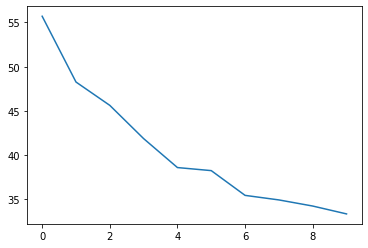

In [67]:
plt.plot(history['test_acc1'])

In [29]:
# for epoch in range(cfg["OPTIM"]["MAX_EPOCH"]):
#     train.train_epoch(train_loader, mlpnet, loss_fn, optimizer, scheduler, log = True)
    
for epoch in range(cfg["OPTIM"]["MAX_EPOCH"]):
    train.train_epoch(train_loader, cnnnet, loss_fn, optimizer, scheduler, log = True)

loss : 1.738206171318698
top1_err : 63.84151214833759
top5_err : 13.659686703206328
---

loss : 1.4061854641760707
top1_err : 51.0202205882353
top5_err : 6.972506391422828
---

loss : 1.2439367591267656
top1_err : 44.84454922298031
top5_err : 4.937659840449653
---

loss : 1.1355562123191325
top1_err : 40.51110933503836
top5_err : 4.136029411764706
---

loss : 1.050073597284839
top1_err : 37.4588395140665
top5_err : 3.2860453933706064
---

loss : 0.9825199755561321
top1_err : 34.71147698697531
top5_err : 2.7757352880199853
---

loss : 0.9343924427886143
top1_err : 32.70780051150895
top5_err : 2.505994239426635
---

loss : 0.8929421519074598
top1_err : 31.247202685421996
top5_err : 2.203484645584965
---

loss : 0.8671706934719134
top1_err : 30.0943094629156
top5_err : 2.0488331226436682
---

loss : 0.8523783496273752
top1_err : 29.76062979539642
top5_err : 1.9948849129249981
---



In [31]:
#train.eval_epoch(test_loader, mlpnet, cfg)
train.eval_epoch(test_loader, cnnnet, cfg)

top1_err : 32.55537974683544
top5_err : 2.4624208860759493
---

